# Import libraries & read data

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_missing, plot_correlation


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [6]:
df = pd.read_csv('all_v2.csv')

# Basic info & statistics

In [4]:
display(df.head().style.set_caption(f'DataFrame object of shape {df.shape}'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [6]:
df.describe()

price       geo_lat       geo_lon        region  building_type  \
count  5.477006e+06  5.477006e+06  5.477006e+06  5.477006e+06   5.477006e+06   
mean   4.422029e+06  5.403826e+01  5.324433e+01  4.307141e+03   1.948966e+00   
std    2.150752e+07  4.622758e+00  2.074763e+01  3.308050e+03   1.038537e+00   
min   -2.144967e+09  4.145906e+01  1.989020e+01  3.000000e+00   0.000000e+00   
25%    1.950000e+06  5.337768e+01  3.777790e+01  2.661000e+03   1.000000e+00   
50%    2.990000e+06  5.517139e+01  4.306774e+01  2.922000e+03   2.000000e+00   
75%    4.802000e+06  5.622613e+01  6.564895e+01  6.171000e+03   3.000000e+00   
max    2.147484e+09  7.198040e+01  1.625361e+02  6.188800e+04   5.000000e+00   

              level        levels         rooms          area  kitchen_area  \
count  5.477006e+06  5.477006e+06  5.477006e+06  5.477006e+06  5.477006e+06   
mean   6.214530e+00  1.139892e+01  1.726173e+00  5.391825e+01  1.062840e+01   
std    4.957419e+00  6.535734e+00  1.082133e+00  3.335293e+01  9.792380e+00   
min    1.000000e+00  1.000000e+00 -2.000000e+00  7.000000e-02  1.000000e-02   
25%    2.000000e+00  5.000000e+00  1.000000e+00  3.800000e+01  7.000000e+00   
50%    5.000000e+00  1.000000e+01  2.000000e+00  4.802000e+01  9.700000e+00   
75%    9.000000e+00  1.600000e+01  2.000000e+00  6.313000e+01  1.270000e+01   
max    3.900000e+01  3.900000e+01  1.000000e+01  7.856000e+03  9.999000e+03   

        object_type  
count  5.477006e+06  
mean   3.945399e+00  
std    4.558357e+00  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    1.100000e+01  
max    1.100000e+01

*У цены и количества комнат имеются отрицательные значения. Для комнат значение -1 означает студию. Но что означает значение -2 и отрицательная цена - не ясно*

In [7]:
df.query('price < 0')

price        date      time    geo_lat    geo_lon  region  \
43821   -1633967296  2018-09-14  10:48:27  57.983337  56.216044    5520   
43822   -1633967296  2018-09-14  10:48:27  57.983337  56.216044    5520   
199895   -429242296  2018-10-04  09:21:35  55.038734  82.985600    9654   
208483  -1744967296  2018-10-06  05:06:46  54.991330  82.882575    9654   
234799  -2053850296  2018-10-10  06:32:39  55.013994  83.003319    9654   
...             ...         ...       ...        ...        ...     ...   
5382188 -2041757296  2021-04-23  07:00:09  57.636265  39.973962    2604   
5382595 -1794967296  2021-04-23  07:37:00  56.115619  38.416266      81   
5398253 -1494967296  2021-04-26  05:04:58  45.111303  36.881901    2843   
5419426 -2094967296  2021-04-27  09:05:31  58.223183  68.305352    3991   
5447885  -344967296  2021-04-30  05:42:35  53.746017  91.427071    2359   

         building_type  level  levels  rooms   area  kitchen_area  object_type  
43821                1     13      22      1  38.92         17.26           11  
43822                1     14      22      1  38.92         17.26           11  
199895               2      5      25      2  57.27          9.31           11  
208483               3      4       5      2  45.00          6.00            1  
234799               1      2      10      3  87.39         12.92           11  
...                ...    ...     ...    ...    ...           ...          ...  
5382188              3      2       4      1  41.08          9.31           11  
5382595              1      4       5      2  56.00          9.00            1  
5398253              3      3       3      1  45.00         17.00           11  
5419426              3     14      19      1  30.00          8.00            1  
5447885              1      7       9      4  67.20          9.20            1  

[365 rows x 13 columns]

In [8]:
df.query('rooms == -2')

price        date      time    geo_lat    geo_lon  region  \
62764     24912000  2018-09-17  12:10:47  45.158259  38.983739    2843   
89002     25500000  2018-09-18  23:29:30  59.926004  30.412955    2661   
112359     3150000  2018-09-21  15:35:50  59.979375  30.512563    2661   
118076     4300000  2018-09-22  17:00:25  55.916469  36.861451      81   
142208    57000000  2018-09-26  09:19:23  55.364445  37.725011      81   
...            ...         ...       ...        ...        ...     ...   
5357663    2350000  2021-04-19  15:41:19  56.114977  47.195134    3019   
5374584  199000000  2021-04-21  23:30:46  59.930705  30.339269    2661   
5392668   36874000  2021-04-24  20:12:21  59.934573  30.272149    2661   
5432473    5200000  2021-04-29  00:08:29  55.834835  38.402951      81   
5474504   23399000  2021-05-01  16:07:54  45.085553  39.044627    2843   

         building_type  level  levels  rooms   area  kitchen_area  object_type  
62764                2     22      22     -2  415.2          40.0           11  
89002                3      1       7     -2  360.0          22.0            1  
112359               2      2      17     -2   35.0           9.0            1  
118076               3      3       5     -2   61.0           5.6            1  
142208               3      3       3     -2  300.0          30.0            1  
...                ...    ...     ...    ...    ...           ...          ...  
5357663              4      4       5     -2    9.0          10.7            1  
5374584              3      2       3     -2    9.0          25.0            1  
5392668              3      2       4     -2    9.0          19.7            1  
5432473              2      7      17     -2    9.0          10.7            1  
5474504              2     24      24     -2    9.0          40.0           11  

[343 rows x 13 columns]

*В обоих случаях значений немного, так что лучше их удалить*

In [9]:
df = df.query('price > 0')
df = df.query('rooms != -2')

In [10]:
# Достанем признаки из времени
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

del df['date']

In [11]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

df['hour'] = df['time'].dt.hour

del df['time']

In [12]:
df.nunique()

price            352631
geo_lat          448265
geo_lon          449647
region               84
building_type         6
level                39
levels               39
rooms                11
area              12733
kitchen_area       4153
object_type           2
year                  4
month                12
day                  31
weekday               7
hour                 24
dtype: int64

*В целом значения цен имеют не слишком большое количество уникальных значений для размера датасета. Как и значения координат. Вероятно имеются одинаковые квартиры с одного дома (например только что построенного) или с ряда соседних таких домов*

# Look at distribution

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …


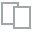
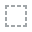
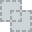
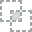
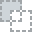
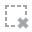
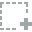
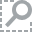
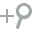
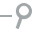
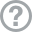
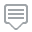
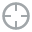
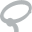
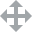
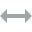
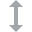
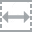
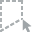
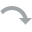
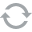
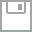
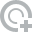
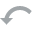
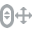
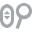
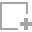
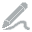
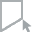
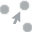
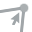
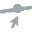

In [4]:
plot_missing(df)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2188 [00:00<?, ?it/s]


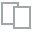
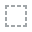
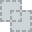
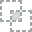
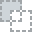
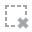
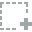
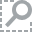
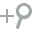
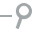
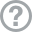
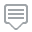
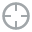
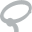
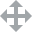
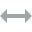
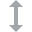
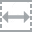
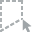
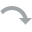
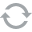
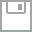
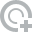
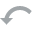
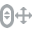
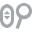
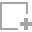
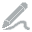
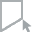
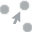
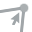
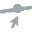

In [14]:
plot(df)

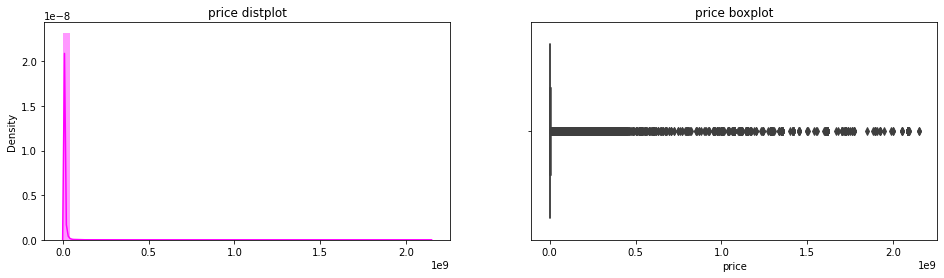

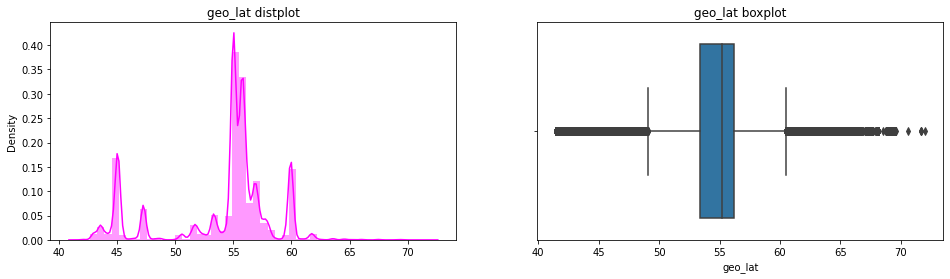

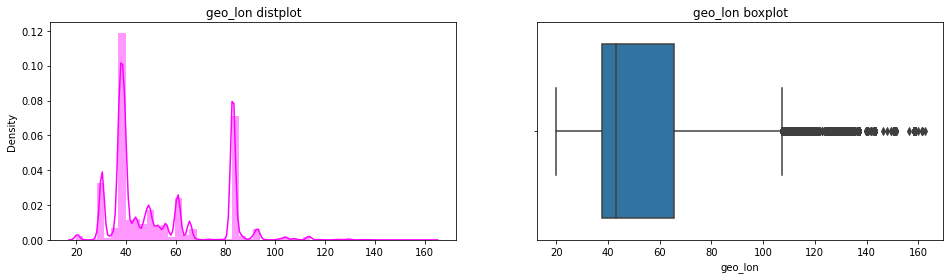

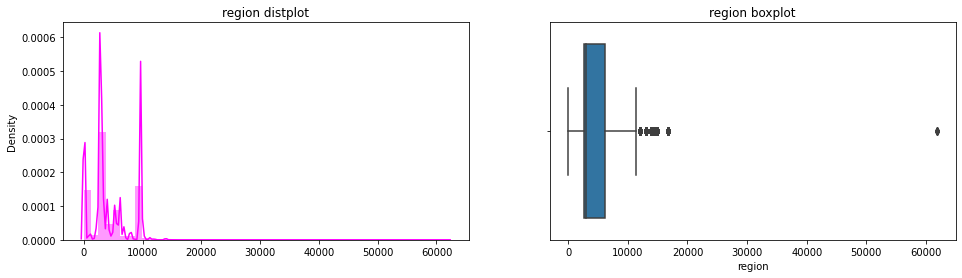

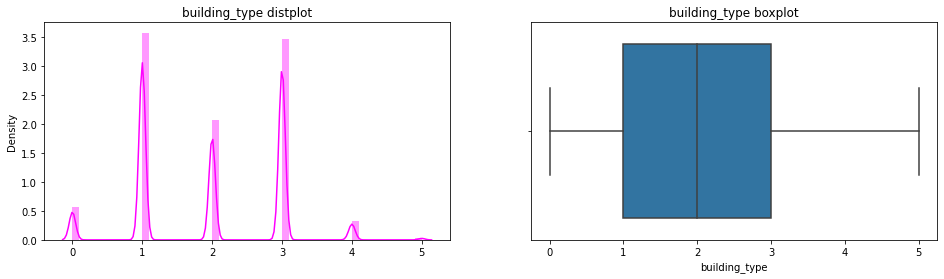

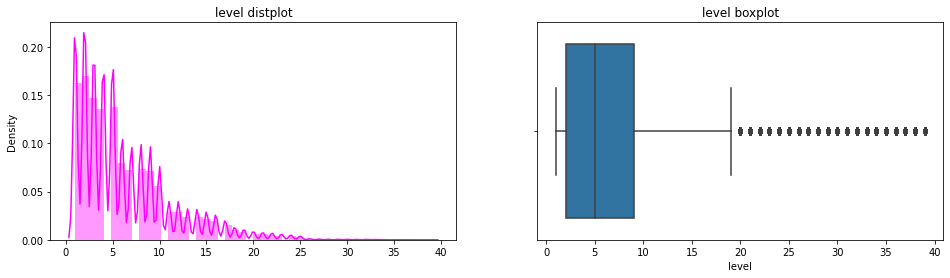

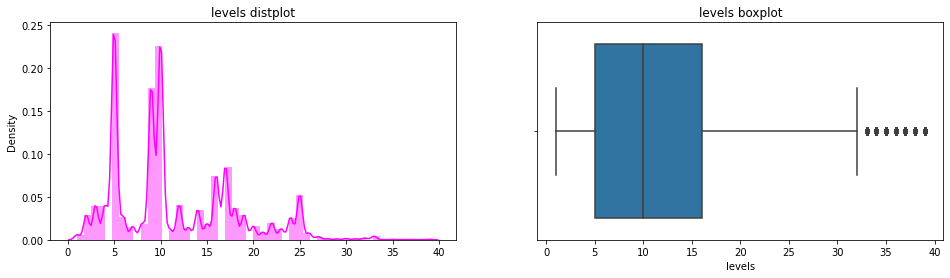

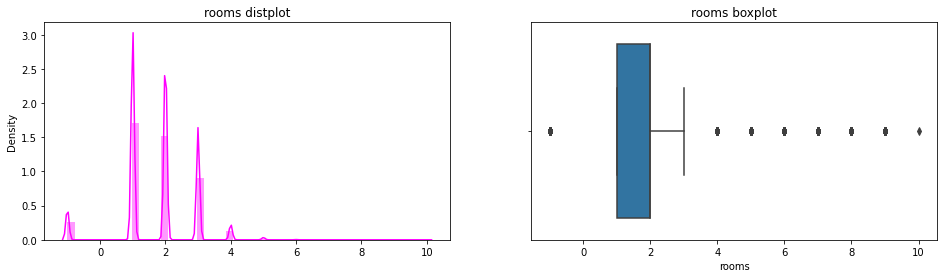

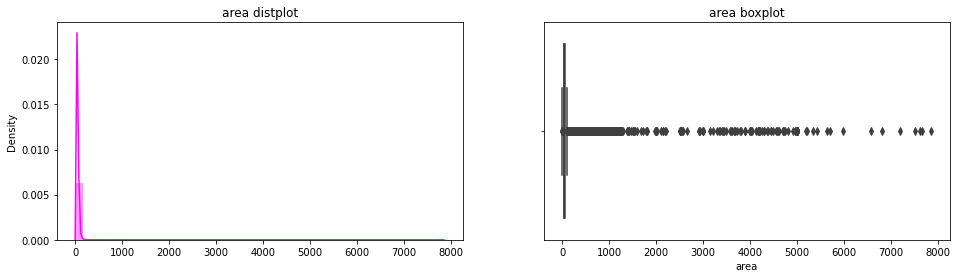

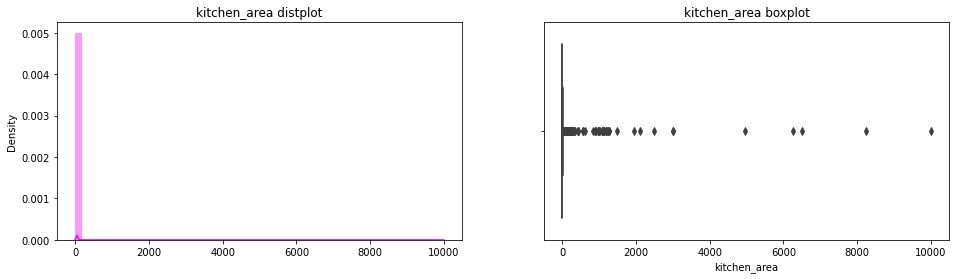

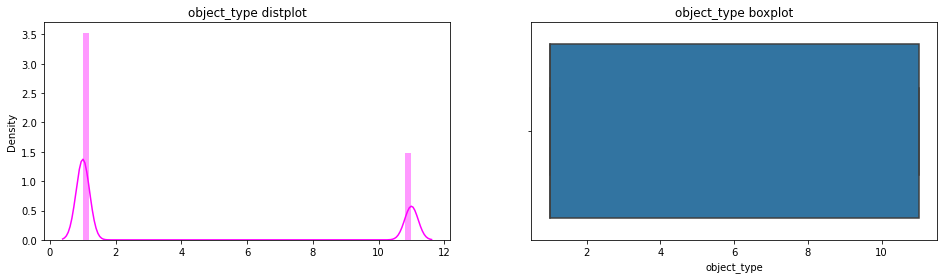

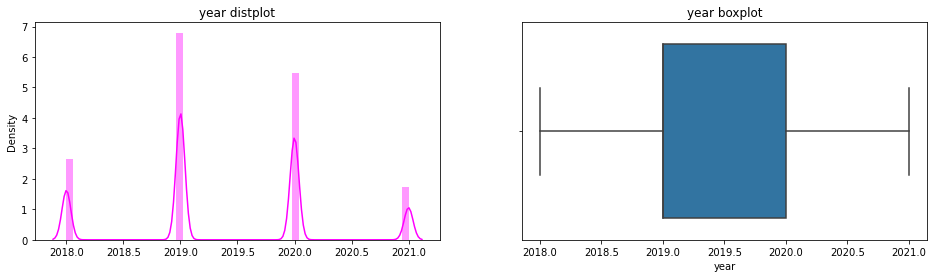

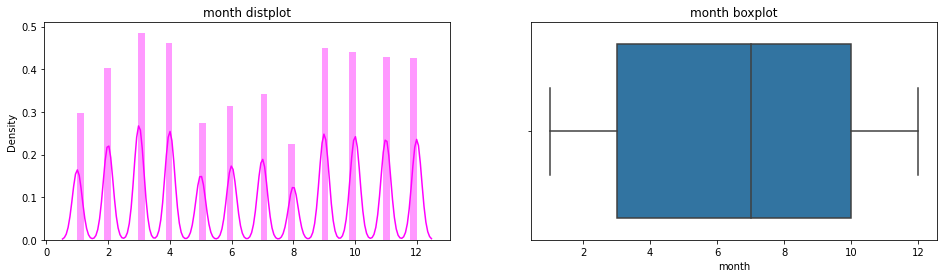

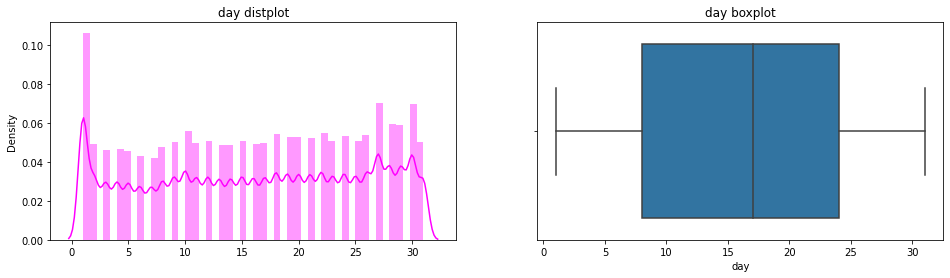

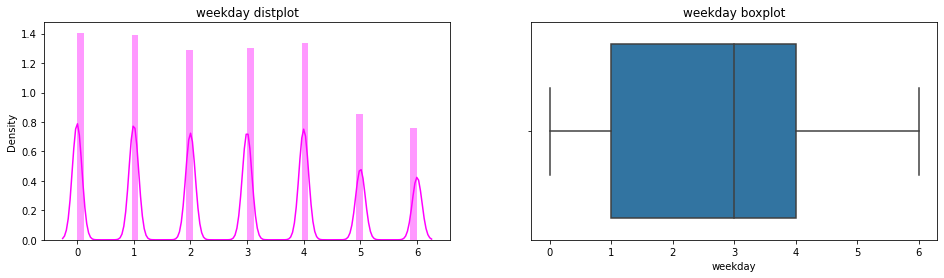

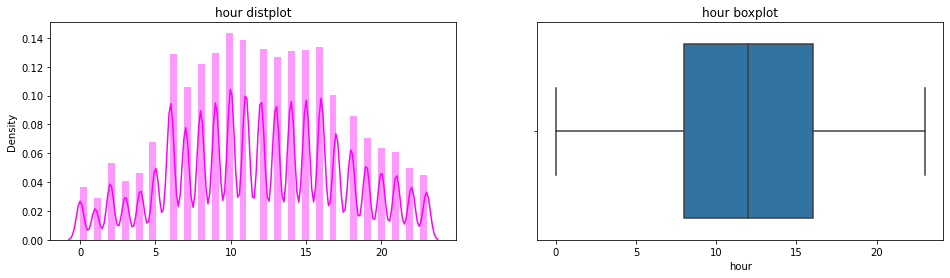

In [15]:
for col in df.columns:
    plt.figure(figsize=[16, 4])
    
    plt.subplot(1, 2, 1)
    sns.distplot(x=df[col], color='magenta')
    plt.title(f"{col} distplot")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    
    plt.show()

*Достаточно перекошенные распределнения.*

*Для предсказания цены хорошо использовать логарифмированное значение*

# Plot Categorical Features

In [16]:
categoricals = ['building_type', 'object_type', 'rooms', 'level', 'levels', 
                'region', 'year', 'month', 'day', 'weekday', 'hour']

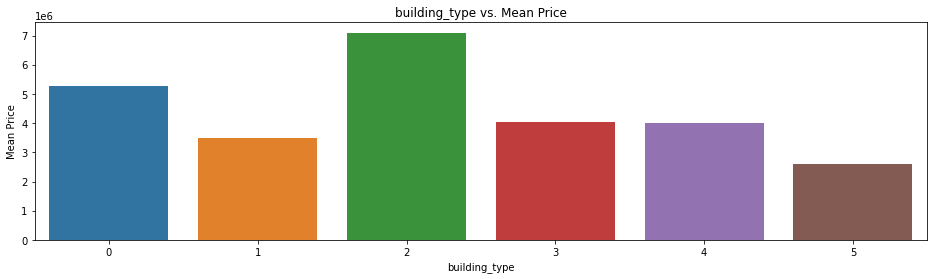

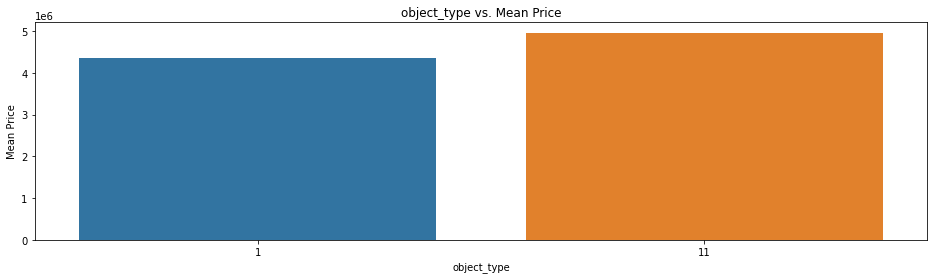

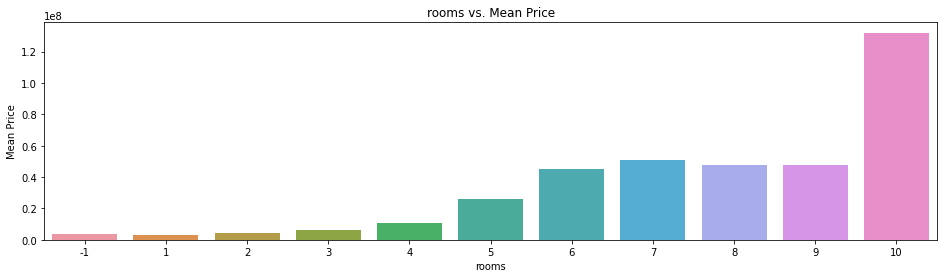

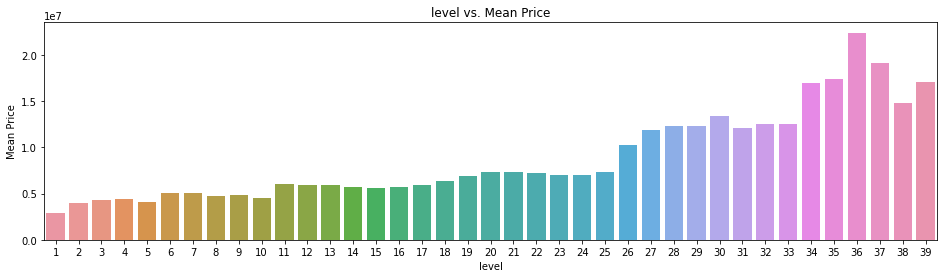

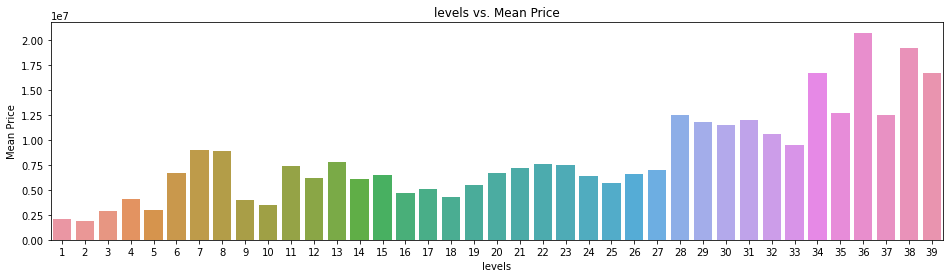

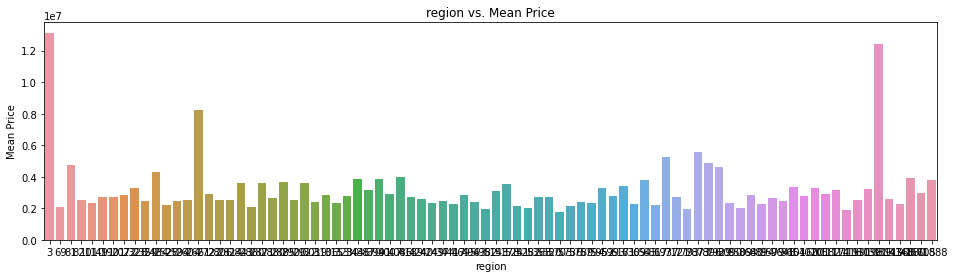

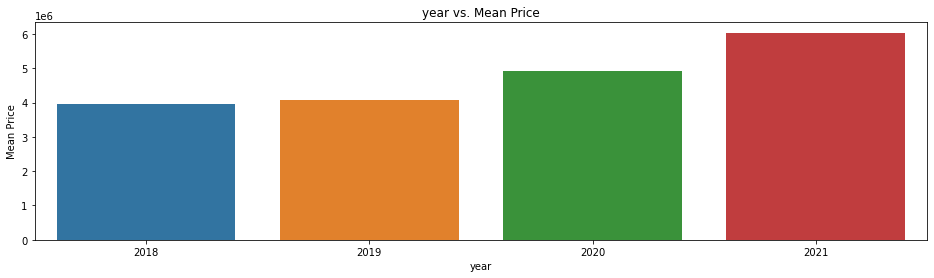

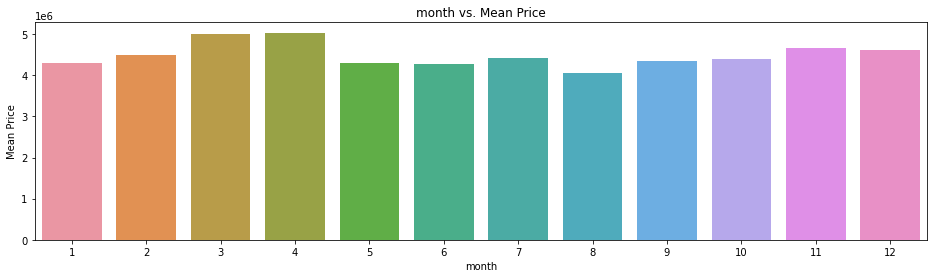

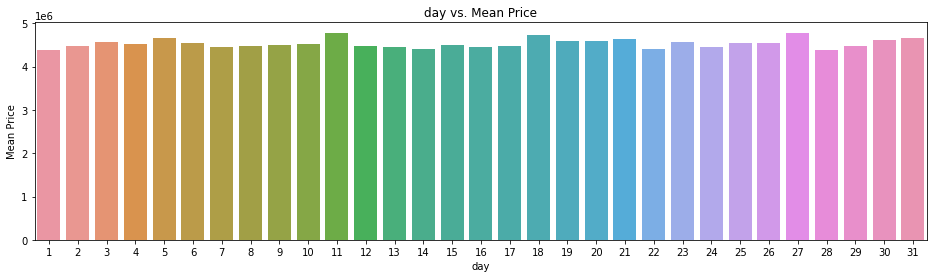

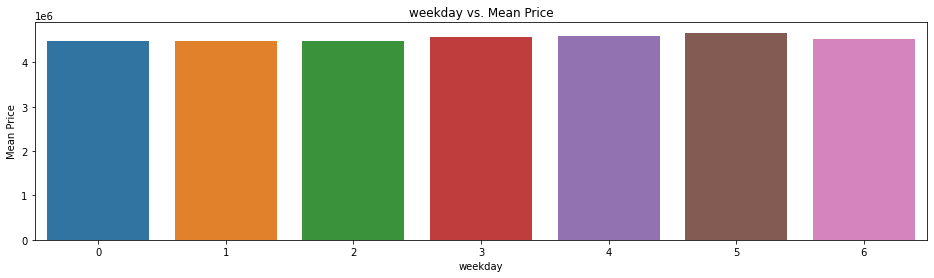

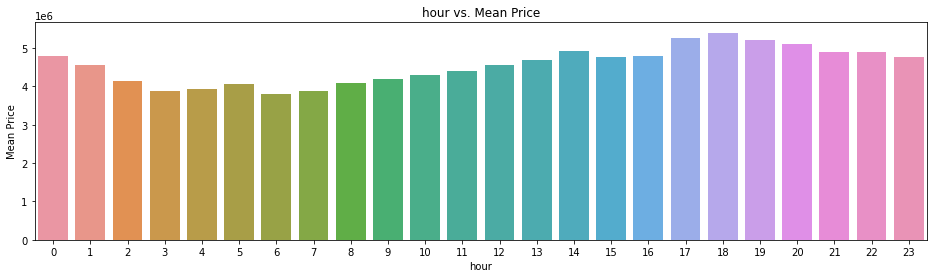

In [17]:
for categorical in categoricals:
    plt.figure(figsize=[16,4])
    ax = sns.barplot(x=df.groupby(categorical)['price'].mean().index, y=df.groupby(categorical)['price'].mean())
    ax.set(xlabel=categorical, ylabel='Mean Price', title=f'{categorical} vs. Mean Price')
    plt.show()

*Можно заметить, что количество комнат и этаж положительно влияют на рост цены. Также местами влияет этажность.*

*По регионам достаточно равномерно, за искючением нескольких регионов с аномально-высокими ценами*

*Ещё можно заметить, что с каждым годом цены на недвижимость растут растут*

*`building_type`, `object_type` можно закодировать как **one hot**, можно как **mean target encoding**, с регионами так же, но можно ещё построить признак на то, является ли этот регион "дорогим"*

*Там, где наблюдается хорошая зависимость, можно использовать **label encoding***

*Недели и дни вряд ли дадут информацию, но можно проверить. С годом есть чёткая корреляция, а от часа может зависеть психологическое состояние человека (а значит и какую он поставит цену), так что теоретически может помочь, но надо проверять*

In [18]:
# Поставим порог "дорогого" региона в 5 миллионов рублей для средней цены
thr = 5e6
expensive_regions = df.groupby('region')['price'].mean().index[df.groupby('region')['price'].mean() > thr]

In [19]:
df['expensive_region'] = df['region'].apply(lambda x: x in expensive_regions).astype(np.int8)

# Correlation

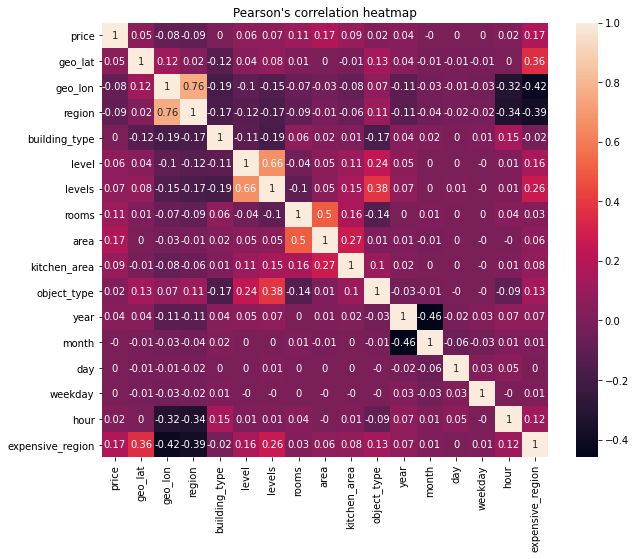

In [20]:
plt.figure(figsize=[10, 8])
sns.heatmap(round(df.corr(), 2), annot=True)
plt.title("Pearson's correlation heatmap")
plt.show()

*Видно, что наша новая переменная оказывает достаточно сильное влияние на цену относительно большинства других переменных*

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


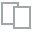
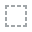
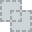
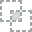
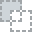
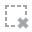
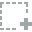
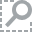
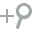
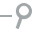
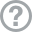
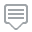
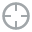
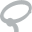
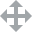
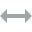
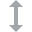
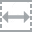
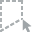
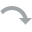
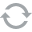
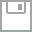
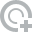
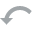
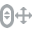
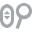
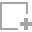
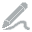
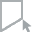
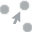
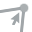
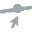

In [21]:
plot_correlation(df)

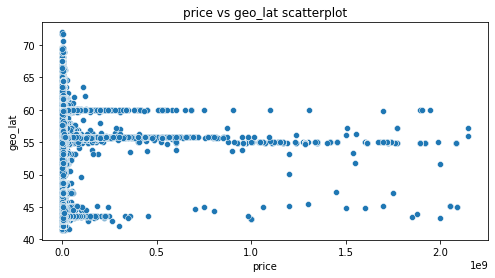

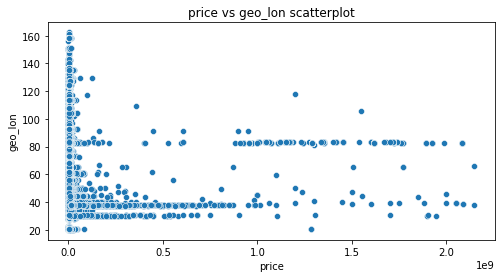

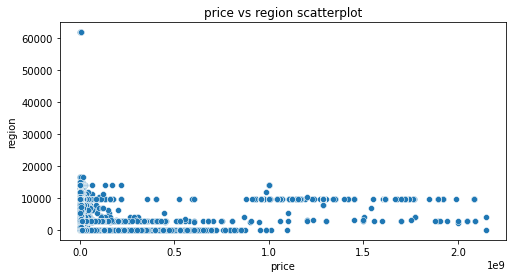

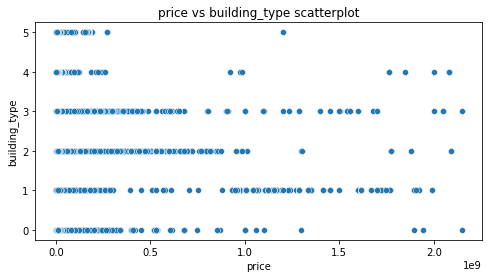

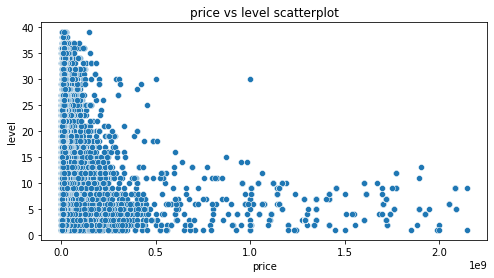

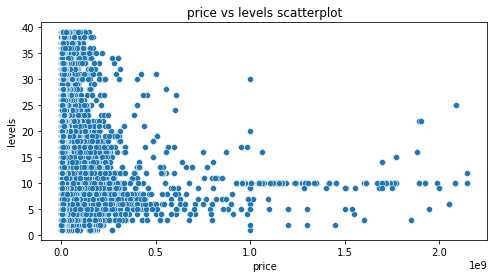

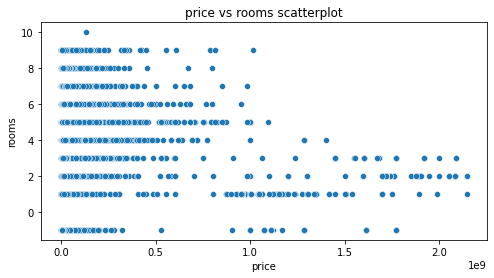

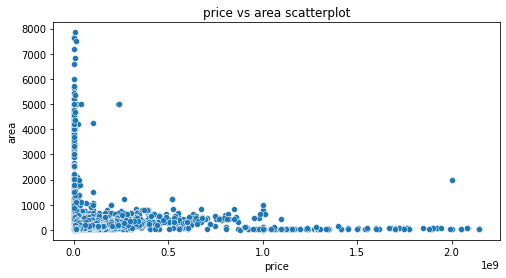

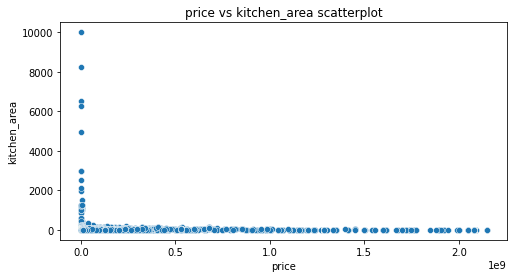

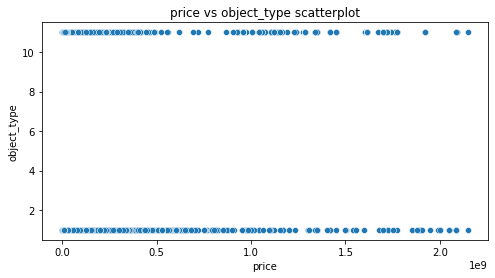

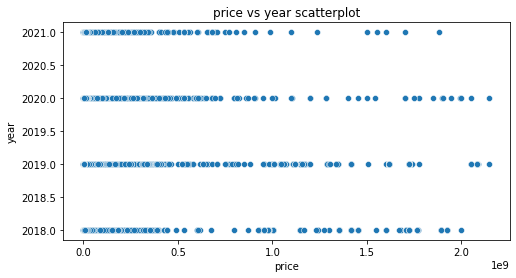

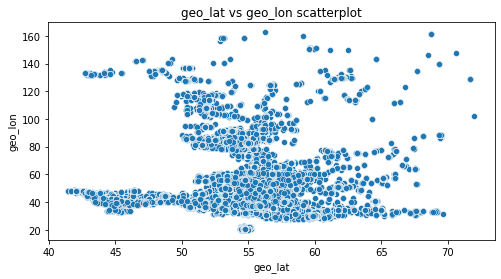

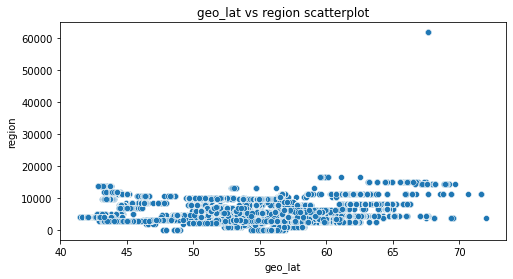

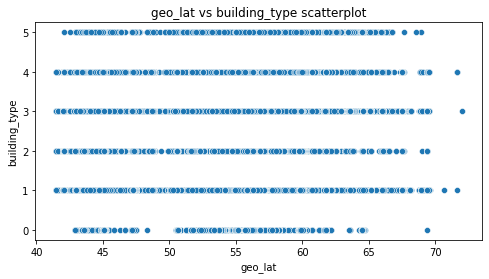

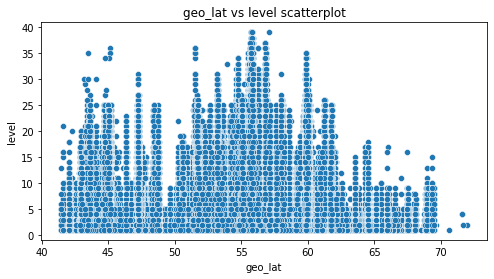

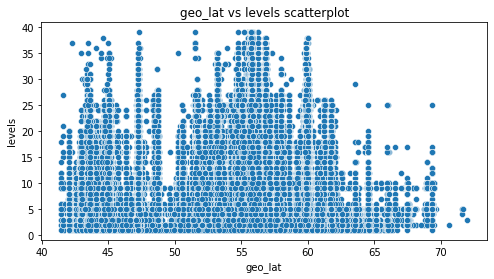

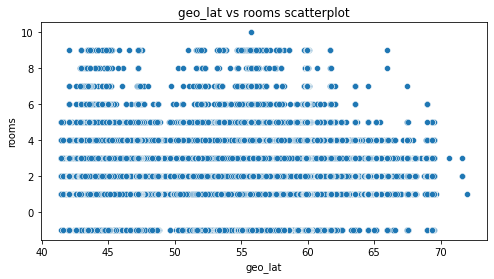

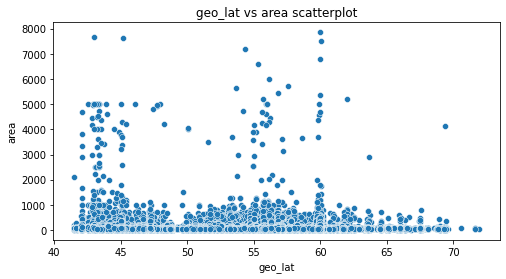

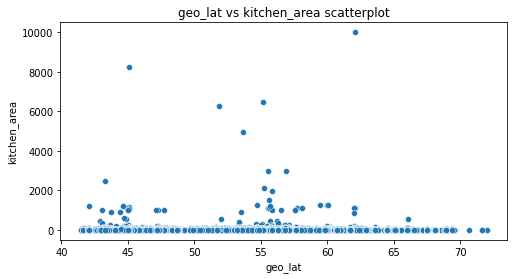

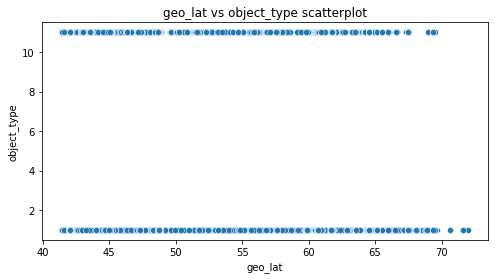

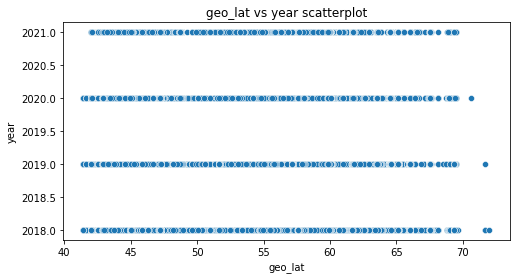

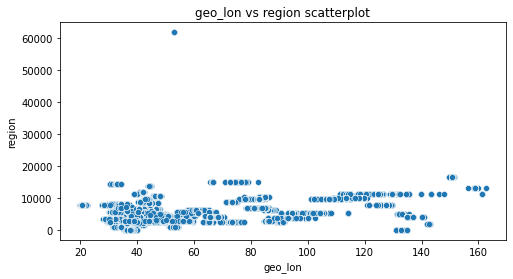

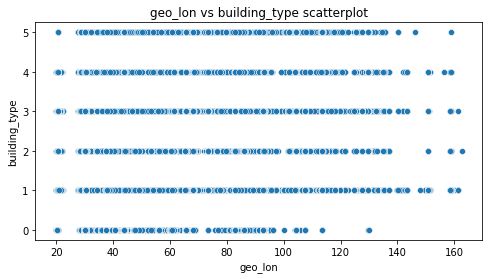

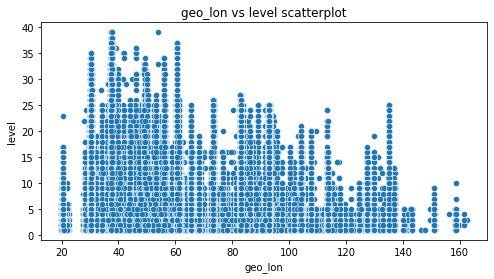

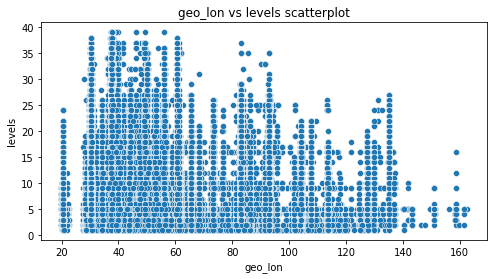

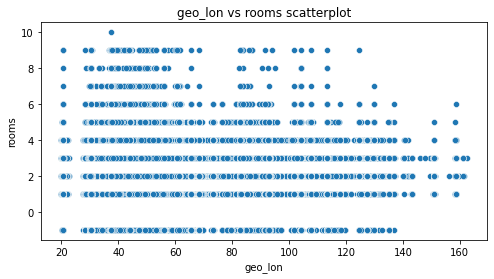

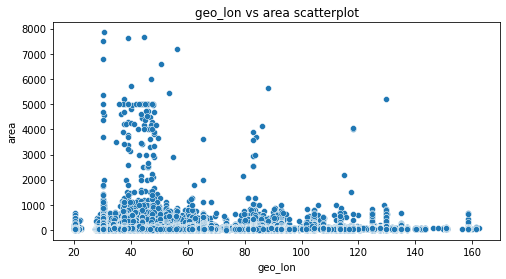

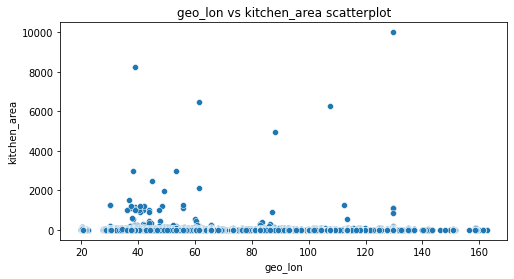

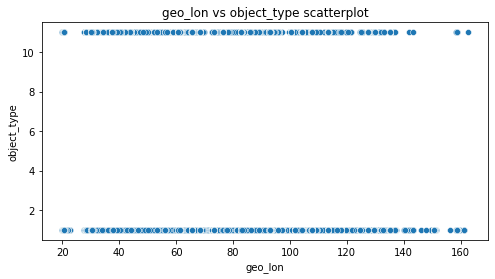

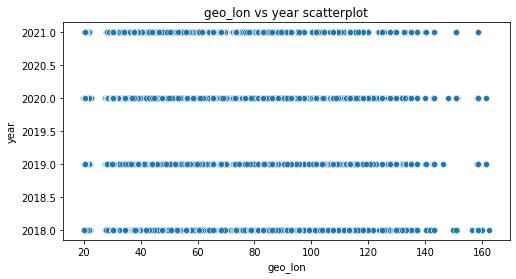

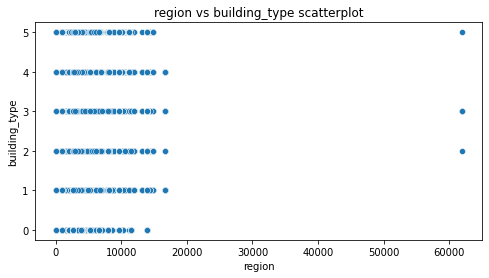

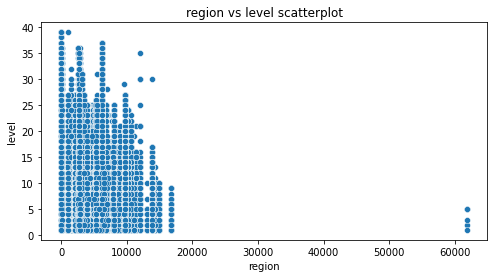

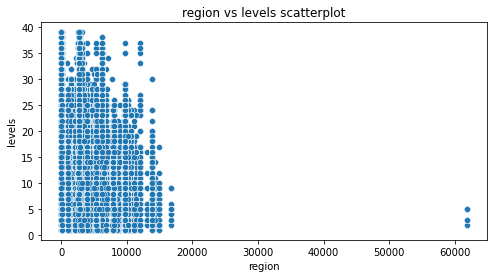

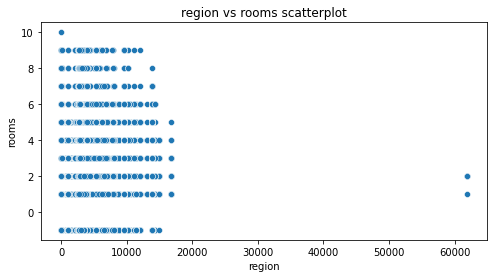

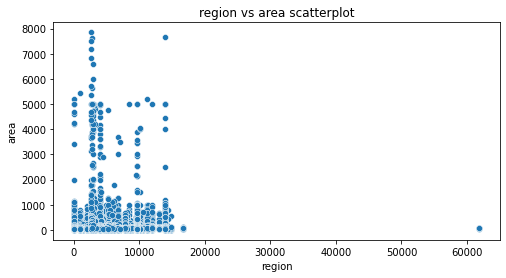

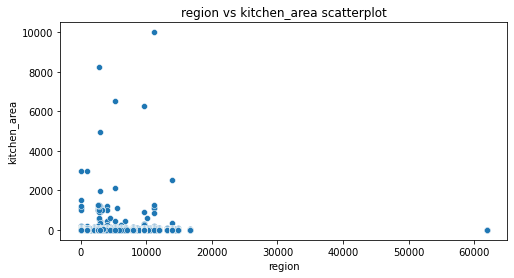

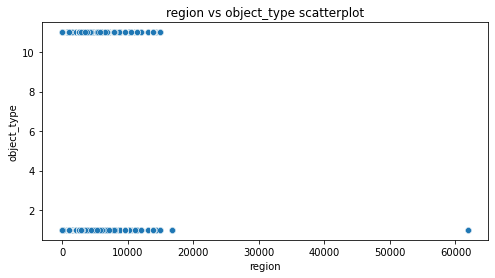

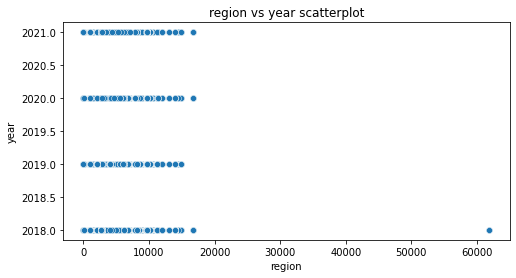

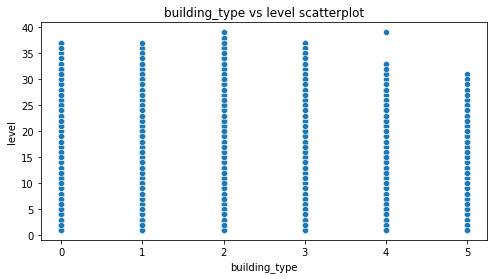

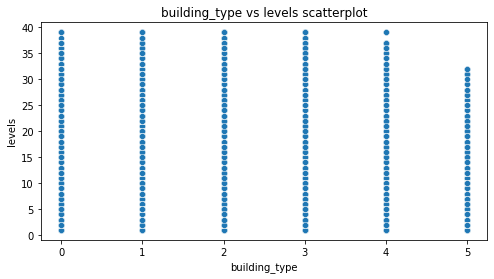

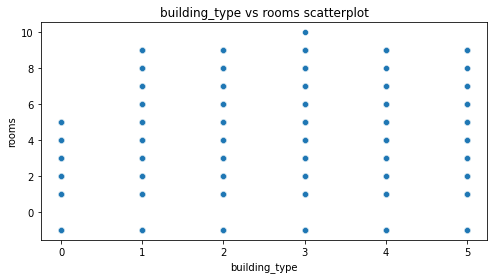

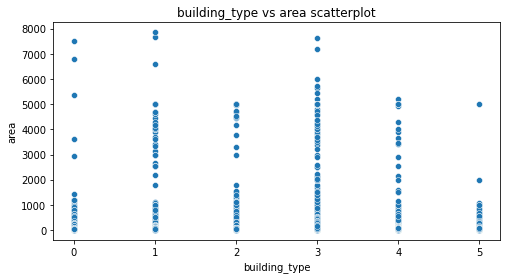

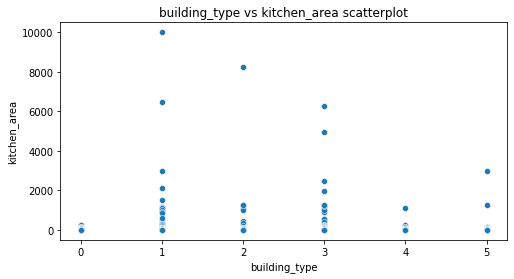

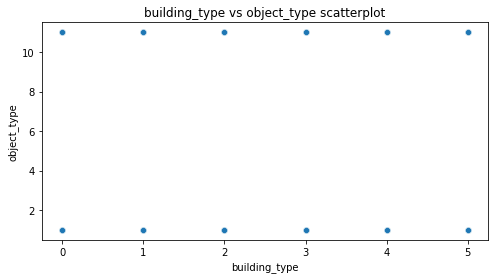

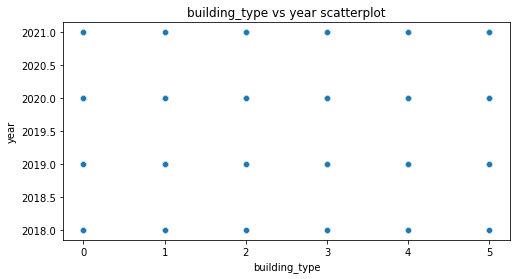

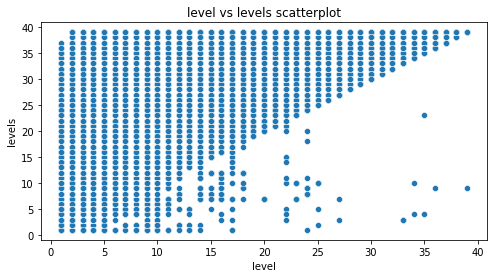

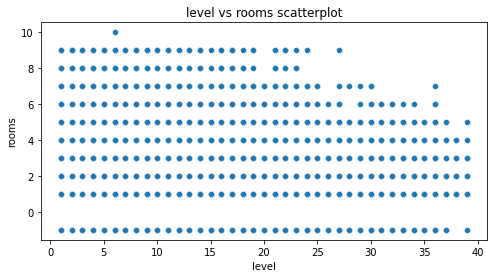

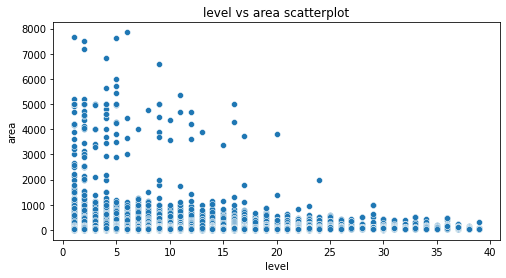

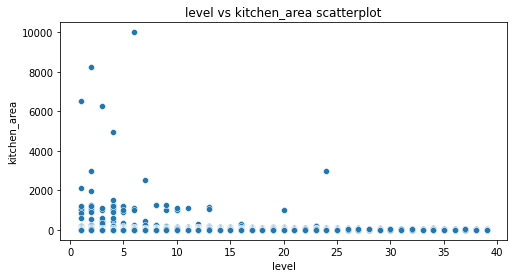

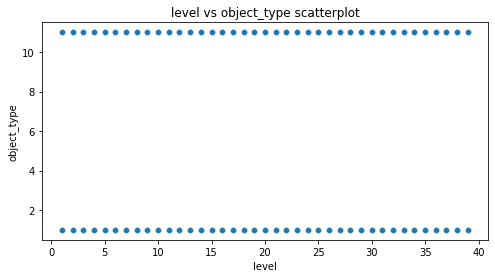

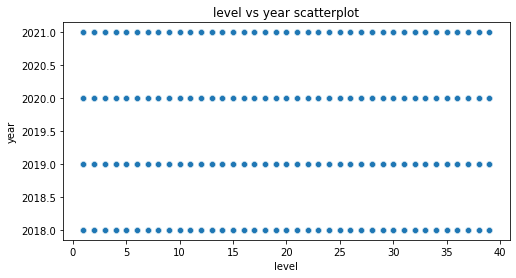

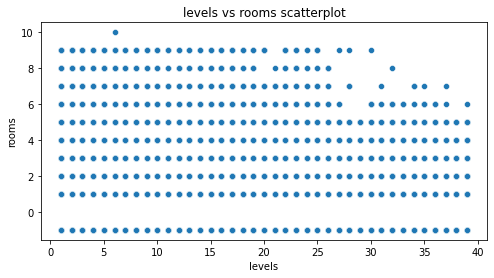

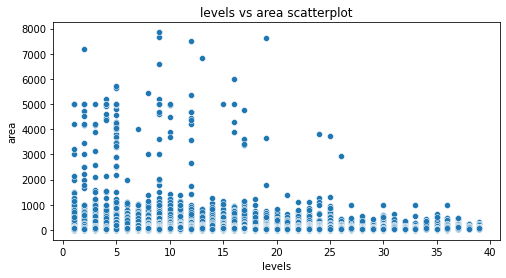

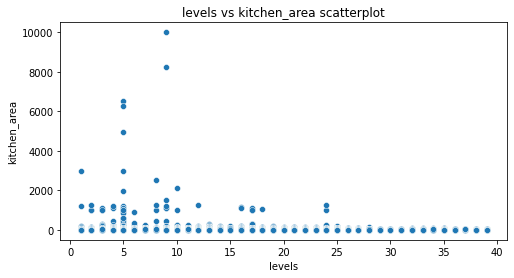

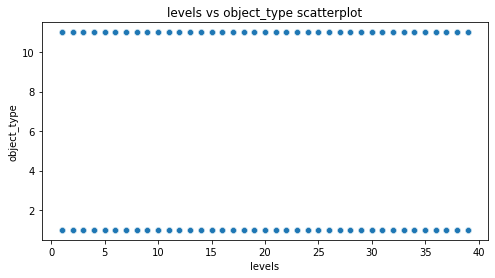

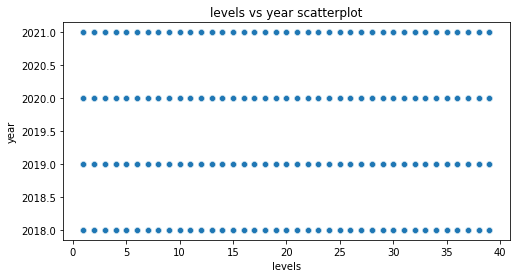

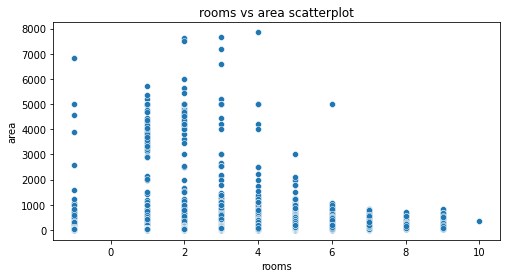

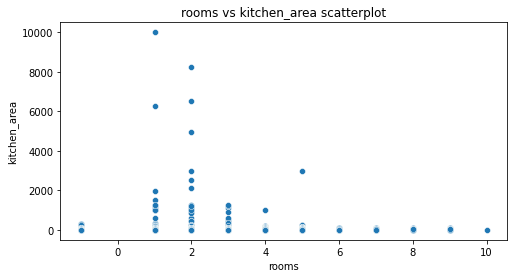

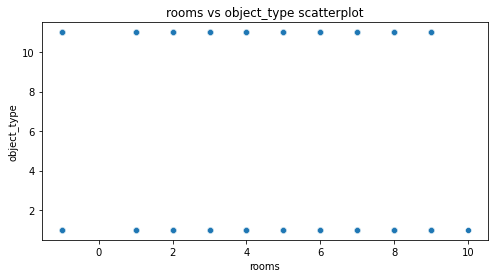

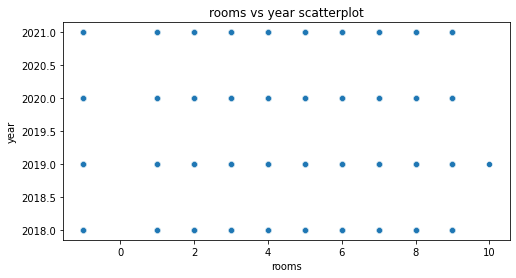

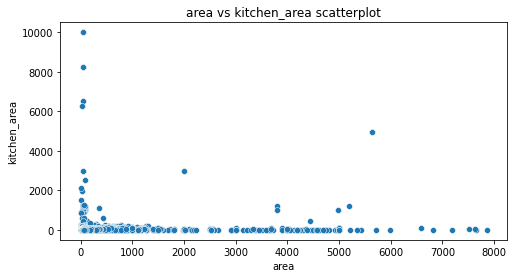

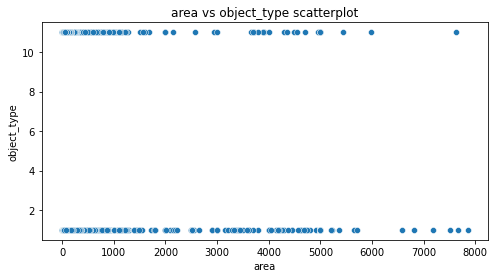

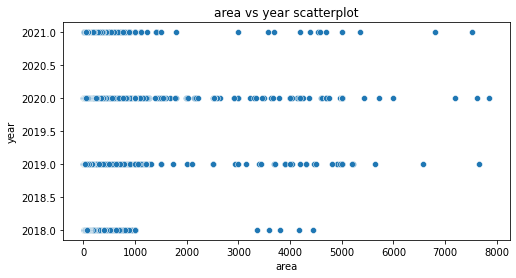

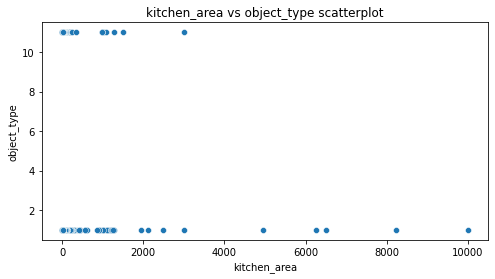

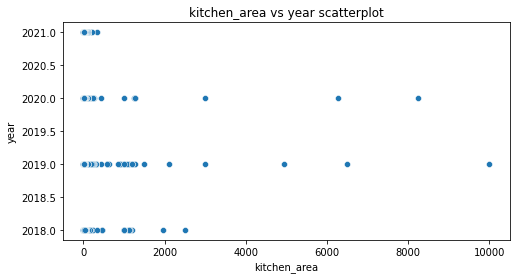

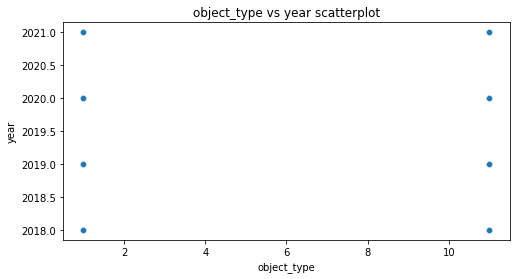

In [22]:
from itertools import combinations

cols = ['price', 'geo_lat', 'geo_lon', 'region', 'building_type', 'level',
       'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'year']

pairs = list(combinations(cols, 2))

for pair in pairs:
    plt.figure(figsize=[8,4])
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'{pair[0]} vs {pair[1]} scatterplot')
    plt.show()